<a href="https://colab.research.google.com/github/thhelen/-Predictive-Modeling-for-State-Fragility-Assessment/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from math import sqrt
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from unidecode import unidecode
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
from plotly.subplots import make_subplots
import plotly.graph_objs as go

In [35]:
train_2006 = pd.read_excel("fsi-2006.xlsx")
train_2007 = pd.read_excel("fsi-2007.xlsx")
train_2008 = pd.read_excel("fsi-2008.xlsx")
train_2009 = pd.read_excel("fsi-2009.xlsx")
train_2010 = pd.read_excel("fsi-2010.xlsx")
train_2011 = pd.read_excel("fsi-2011.xlsx")
train_2012 = pd.read_excel("fsi-2012.xlsx")
train_2013 = pd.read_excel("fsi-2013.xlsx")
train_2014 = pd.read_excel("fsi-2014.xlsx")
train_2015 = pd.read_excel("fsi-2015.xlsx")
train_2016 = pd.read_excel("fsi-2016.xlsx")
train_2017 = pd.read_excel("fsi-2017.xlsx")
train_2018 = pd.read_excel("fsi-2018.xlsx")
train_2019 = pd.read_excel("fsi-2019.xlsx")
train_2020 = pd.read_excel("fsi-2020.xlsx")
train_2021 = pd.read_excel("fsi-2021.xlsx")
train_2022 = pd.read_excel("fsi-2022-download.xlsx")
train_2023 = pd.read_excel("FSI-2023-DOWNLOAD (1).xlsx")


In [36]:
train_2006.Country.unique()

array(['Sudan', 'Congo Democratic Republic', "Cote d'Ivoire", 'Iraq',
       'Zimbabwe', 'Chad', 'Somalia', 'Haiti', 'Pakistan', 'Afghanistan',
       'Guinea', 'Liberia', 'Central African Republic', 'North Korea',
       'Burundi', 'Sierra Leone', 'Yemen', 'Myanmar', 'Bangladesh',
       'Nepal', 'Uganda', 'Nigeria', 'Uzbekistan', 'Rwanda', 'Sri Lanka ',
       'Ethiopia', 'Colombia', 'Kyrgyz Republic', 'Malawi',
       'Burkina Faso', 'Egypt', 'Indonesia', 'Kenya', 'Syria',
       'Bosnia and Herzegovina', 'Cameroon', 'Angola', 'Togo', 'Bhutan',
       'Laos', 'Mauritania', 'Tajikistan', 'Russia', 'Niger ',
       'Turkmenistan', 'Guinea Bissau', 'Cambodia ', 'Dominican Republic',
       'Papua New Guinea ', 'Belarus', 'Guatemala', 'Equatorial Guinea',
       'Iran', 'Eritrea', 'Serbia  ', 'Bolivia', 'China', 'Moldova',
       'Nicaragua ', 'Georgia ', 'Azerbaijan', 'Cuba', 'Ecuador',
       'Venezuela', 'Lebanon', 'Zambia', 'Israel and West Bank', 'Peru',
       'Philippines', 'Viet

In [37]:
#converting year column to proper format
dfs = [train_2006, train_2007, train_2008, train_2009, train_2010, train_2011, train_2012, train_2013, train_2014, train_2015, train_2016, train_2017, train_2018, train_2019, train_2020, train_2022]
for i in dfs:
    i['Year'] = pd.to_datetime(i['Year'])
    i['Year'] = i['Year'].dt.year

In [38]:
for i in dfs:
    i['Country'] = i['Country'].str.strip()

In [39]:
for i in dfs:
    i['Country'] = i['Country'].apply(lambda x: unidecode(x) if pd.notnull(x) else x)

In [40]:
#combning data for all years
combined_train = pd.DataFrame()
dfs = [train_2006, train_2007, train_2008, train_2009, train_2010, train_2011, train_2012, train_2013, train_2014, train_2015, train_2016, train_2017, train_2018, train_2019, train_2020, train_2021, train_2022, train_2023]
for i in dfs:
    combined_train = pd.concat([combined_train, i], ignore_index=True)
combined_train.head()

,Country,Year,Rank,Total,C1: Security Apparatus,C2: Factionalized Elites,C3: Group Grievance,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,Change from Previous Year
0,Sudan,2006,1st,112.3,9.8,9.1,9.7,7.5,9.2,9.1,9.5,9.5,9.8,9.6,9.7,9.8,NaN
1,Congo Democratic Republic,2006,2nd,110.1,9.8,9.6,9.1,8.1,9.0,8.0,9.0,9.0,9.5,9.5,9.5,10.0,NaN
2,Cote d'Ivoire,2006,3rd,109.2,9.8,9.8,9.8,9.0,8.0,8.5,10.0,8.5,9.4,8.8,7.6,10.0,NaN
3,Iraq,2006,4th,109.0,9.8,9.7,9.8,8.2,8.7,9.1,8.5,8.3,9.7,8.9,8.3,10.0,NaN
4,Zimbabwe,2006,5th,108.9,9.4,8.5,8.5,9.8,9.2,9.0,8.9,9.5,9.5,9.7,8.9,8.0,NaN


<ipython-input-41-814667724fb4>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




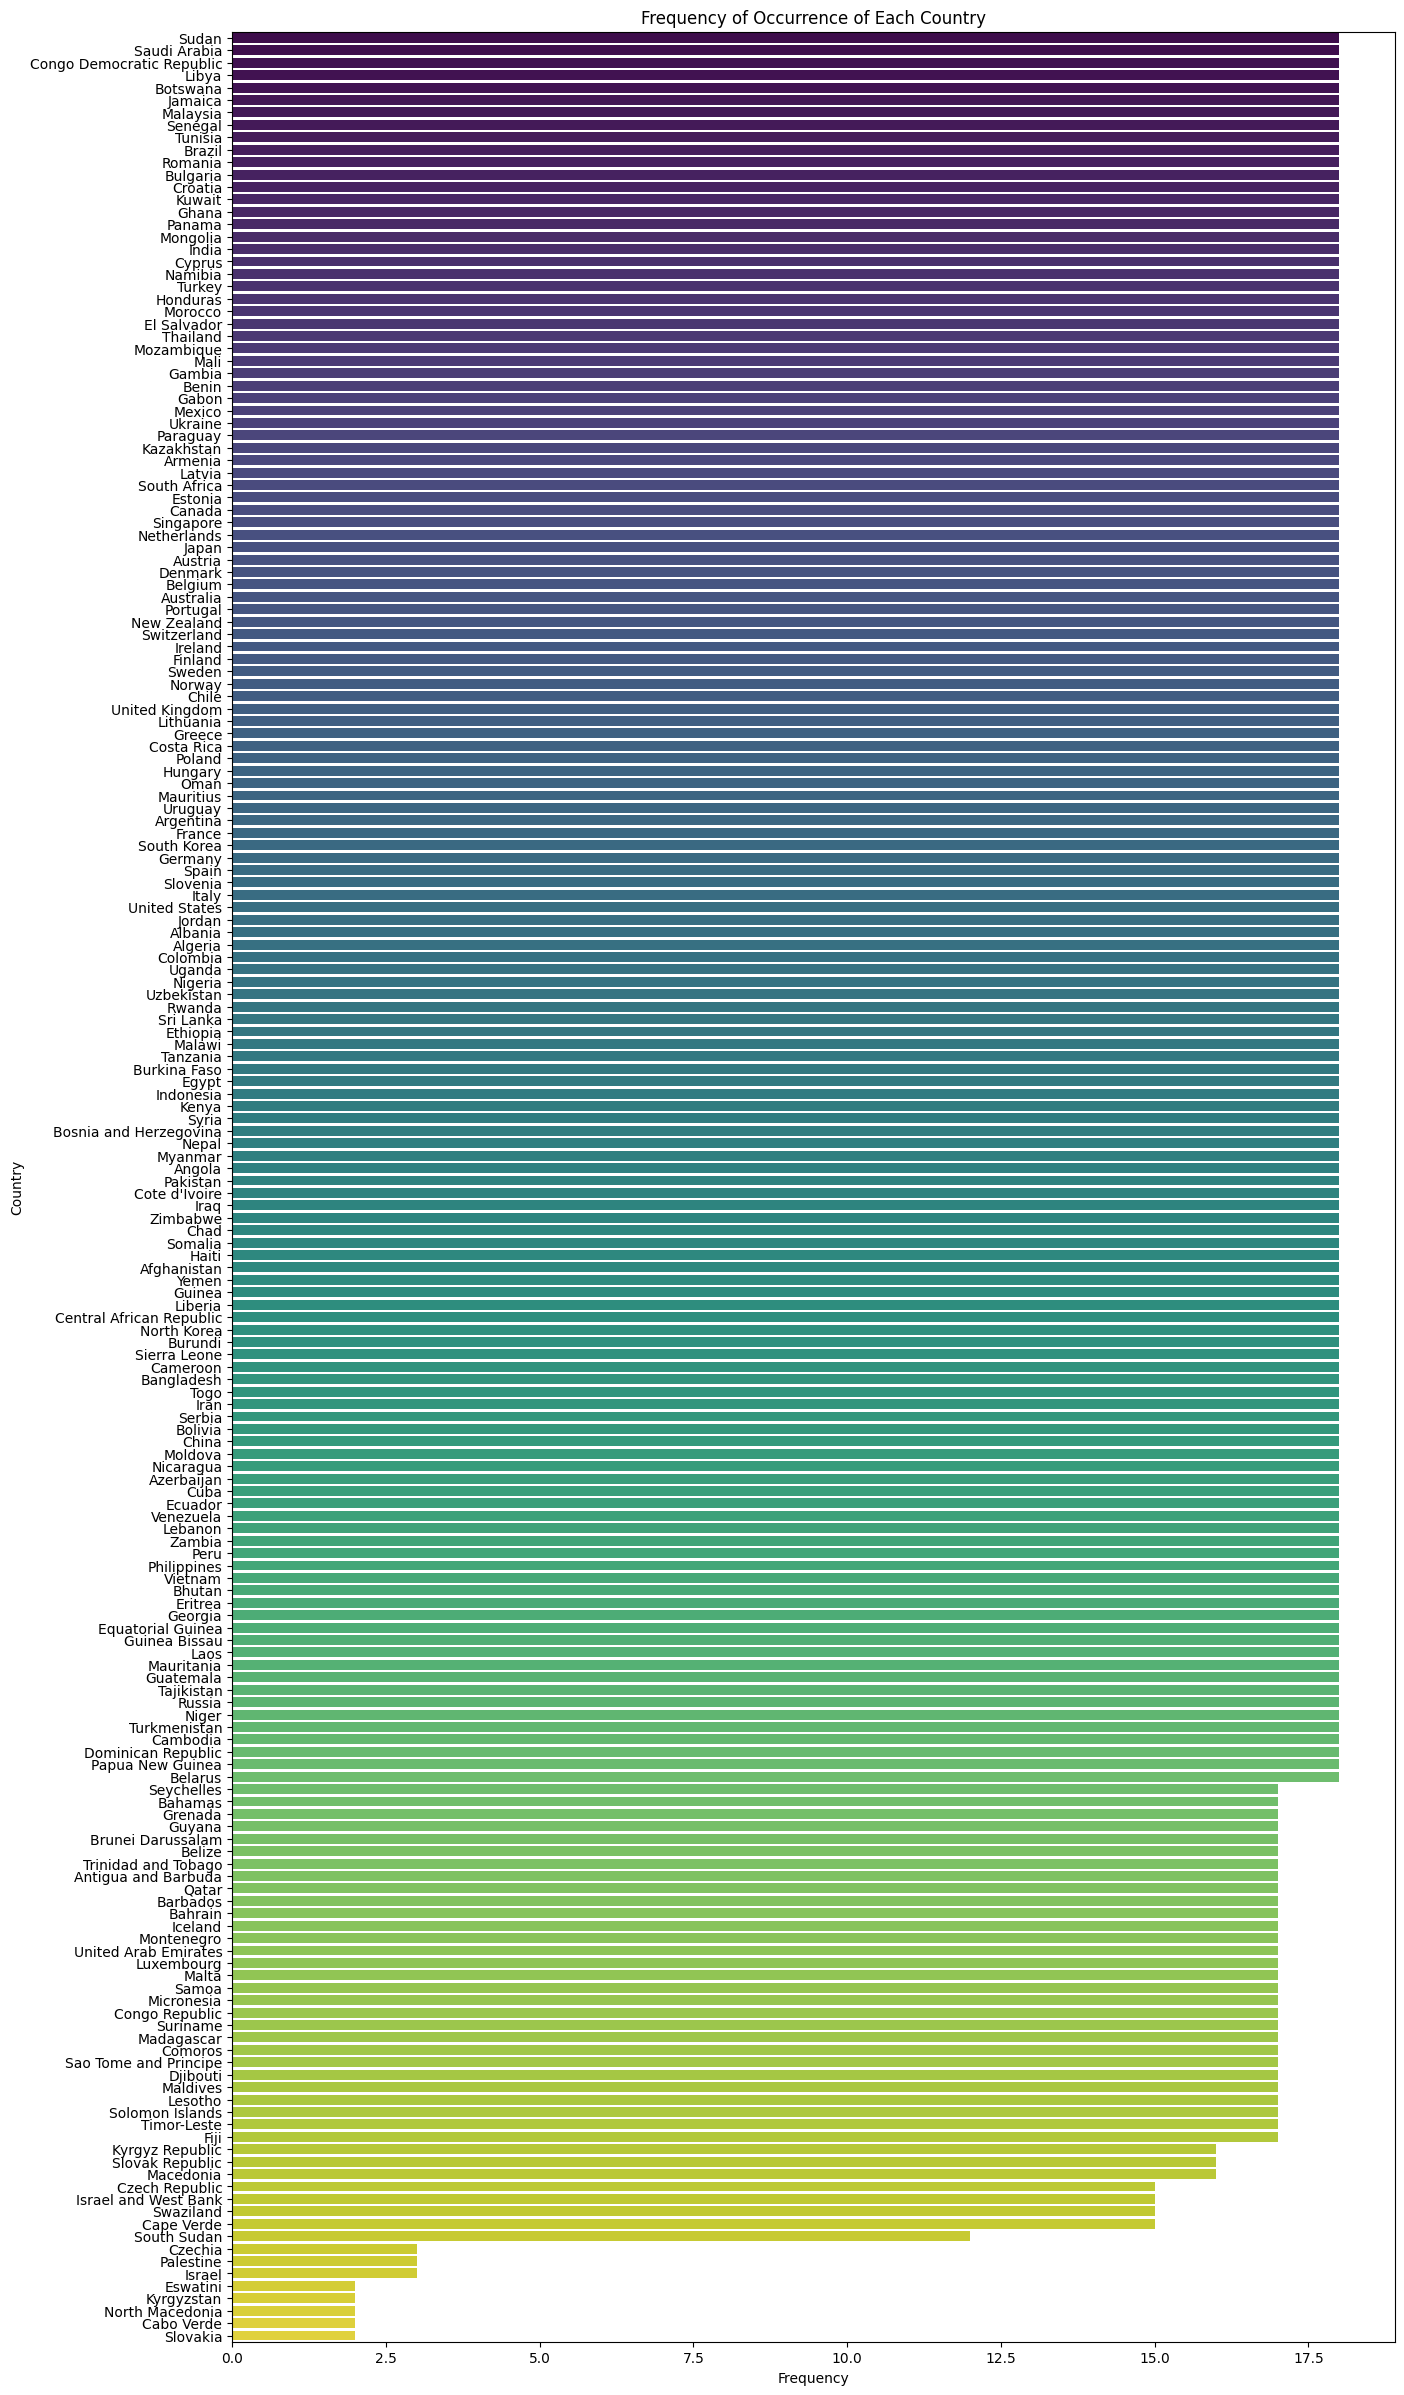

In [41]:
country_counts = combined_train['Country'].value_counts()
plt.figure(figsize=(15, 30))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')
plt.title('Frequency of Occurrence of Each Country')
plt.xlabel('Frequency')
plt.ylabel('Country')
plt.show()

In [42]:
country_counts = combined_train['Country'].value_counts()
unique_countries = pd.DataFrame({'Country': country_counts.index, 'Frequency': country_counts.values})
unique_countries.Frequency.value_counts()

,count
Frequency,
18,141
17,29
2,5
15,4
16,3
3,3
12,1


In [43]:
countries_with_all_data = combined_train.groupby('Country')['Year'].count() == 18
countries_with_all_data = countries_with_all_data[countries_with_all_data].index.tolist()

combined_train = combined_train[combined_train['Country'].isin(countries_with_all_data)]

In [44]:
combined_train.head()

,Country,Year,Rank,Total,C1: Security Apparatus,C2: Factionalized Elites,C3: Group Grievance,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,Change from Previous Year
0,Sudan,2006,1st,112.3,9.8,9.1,9.7,7.5,9.2,9.1,9.5,9.5,9.8,9.6,9.7,9.8,NaN
1,Congo Democratic Republic,2006,2nd,110.1,9.8,9.6,9.1,8.1,9.0,8.0,9.0,9.0,9.5,9.5,9.5,10.0,NaN
2,Cote d'Ivoire,2006,3rd,109.2,9.8,9.8,9.8,9.0,8.0,8.5,10.0,8.5,9.4,8.8,7.6,10.0,NaN
3,Iraq,2006,4th,109.0,9.8,9.7,9.8,8.2,8.7,9.1,8.5,8.3,9.7,8.9,8.3,10.0,NaN
4,Zimbabwe,2006,5th,108.9,9.4,8.5,8.5,9.8,9.2,9.0,8.9,9.5,9.5,9.7,8.9,8.0,NaN


In [45]:
combined_train.isna().sum()

,0
Country,0
Year,0
Rank,0
Total,0
C1: Security Apparatus,0
C2: Factionalized Elites,0
C3: Group Grievance,0
E1: Economy,0
E2: Economic Inequality,0
E3: Human Flight and Brain Drain,0


In [46]:
print(combined_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2538 entries, 0 to 3169
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           2538 non-null   object 
 1   Year                              2538 non-null   int64  
 2   Rank                              2538 non-null   object 
 3   Total                             2538 non-null   float64
 4   C1: Security Apparatus            2538 non-null   float64
 5   C2: Factionalized Elites          2538 non-null   float64
 6   C3: Group Grievance               2538 non-null   float64
 7   E1: Economy                       2538 non-null   float64
 8   E2: Economic Inequality           2538 non-null   float64
 9   E3: Human Flight and Brain Drain  2538 non-null   float64
 10  P1: State Legitimacy              2538 non-null   float64
 11  P2: Public Services               2538 non-null   float64
 12  P3: Human R

In [47]:
combined_train.describe()

,Year,Total,C1: Security Apparatus,C2: Factionalized Elites,C3: Group Grievance,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,Change from Previous Year
count,2538.00000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,282.000000
mean,2014.50000,70.348164,5.685725,6.423938,6.131543,5.690833,6.183210,5.454320,6.199561,5.731305,5.922627,6.126124,5.257107,5.542219,-1.292104
std,5.18915,24.688066,2.456103,2.564191,2.122635,1.970781,2.101103,2.068445,2.689133,2.527024,2.500580,2.293144,2.416711,2.462962,1.311032
min,2006.00000,14.500000,0.300000,0.700000,0.300000,1.000000,0.500000,0.400000,0.200000,0.626666,0.300000,0.700000,0.400000,0.300000,-5.300000
25%,2010.00000,51.825000,3.800000,4.300000,4.500000,4.300000,4.700000,4.000000,4.400000,3.800000,3.916944,4.300000,3.200000,3.800000,-2.188855
50%,2014.50000,75.464265,6.000000,7.200000,6.200000,5.800000,6.600000,5.900000,6.900000,6.000000,6.500000,6.400000,5.200000,5.900000,-1.600000
75%,2019.00000,88.500000,7.500000,8.400000,7.800000,7.100000,7.900000,7.028618,8.300000,8.000000,7.800000,8.100000,7.200000,7.300000,-0.700677
max,2023.00000,114.900000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.613527


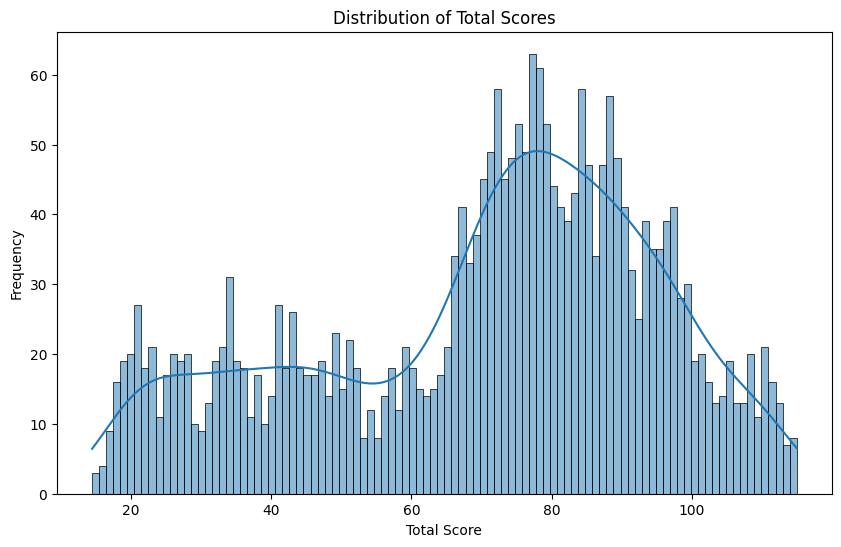

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(combined_train['Total'], bins=100, kde=True)
plt.title('Distribution of Total Scores')
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.show()

In [49]:
fig = px.choropleth(
    combined_train,
    locations="Country",
    locationmode="country names",
    color="Total",
    animation_frame="Year",
    color_continuous_scale="Inferno_r",
    title="Fragility Index Heatmap Over Years",
    labels={'Total': 'Fragility Index'}
)
fig.update_layout(width=1200, height=800)
fig.show()

In [53]:
data = combined_train[['Total','C1: Security Apparatus', 'C2: Factionalized Elites', 'C3: Group Grievance',
                    'E1: Economy', 'E2: Economic Inequality', 'E3: Human Flight and Brain Drain',
                    'P1: State Legitimacy', 'P2: Public Services', 'P3: Human Rights',
                    'S1: Demographic Pressures', 'S2: Refugees and IDPs', 'X1: External Intervention']]
app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id='column-selector',
        options=[{'label': col, 'value': col} for col in data.columns],
        value='Total',
        style={'width': '50%'}
    ),
    dcc.Graph(id='choropleth-graph')
])

@app.callback(
    Output('choropleth-graph', 'figure'),
    [Input('column-selector', 'value')]
)
def update_choropleth(selected_column):
    fig = px.choropleth(
        combined_train,
        locations="Country",
        locationmode="country names",
        color=selected_column,
        animation_frame="Year",
        color_continuous_scale="Inferno_r",
        title=f"{selected_column} Heatmap Over Years",
        labels={selected_column: selected_column}
    )
    fig.update_layout(width=1000, height=600)
    return fig
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [54]:
data = combined_train[['C1: Security Apparatus', 'C2: Factionalized Elites', 'C3: Group Grievance',
                    'E1: Economy', 'E2: Economic Inequality', 'E3: Human Flight and Brain Drain',
                    'P1: State Legitimacy', 'P2: Public Services', 'P3: Human Rights',
                    'S1: Demographic Pressures', 'S2: Refugees and IDPs', 'X1: External Intervention']]

app = dash.Dash(__name__)
app.layout = html.Div([
    dcc.Dropdown(
        id='country-selector',
        options=[{'label': country, 'value': country} for country in combined_train['Country'].unique()],
        value=['Country A'],
        multi=True,
        style={'width': '50%'}
    ),
    dcc.Graph(id='line-plots')
])

@app.callback(
    Output('line-plots', 'figure'),
    [Input('country-selector', 'value')]
)
def update_line_plots(selected_countries):
    filtered_data = combined_train[combined_train['Country'].isin(selected_countries)]
    fig = make_subplots(rows=6, cols=2, subplot_titles=data.columns)
    for i, column in enumerate(data.columns):
        row = (i // 2) + 1
        col = (i % 2) + 1
        for country in selected_countries:
            trace = go.Scatter(
                x=filtered_data[filtered_data['Country'] == country]['Year'],
                y=filtered_data[filtered_data['Country'] == country][column],
                mode='lines',
                name=country
            )
            fig.add_trace(trace, row=row, col=col)

    fig.update_layout(
        height=1600,
        showlegend=False,
        title_text='Line Plots for Selected Countries Over Years',
        title_x=0.5,
        title_font=dict(size=16),
        legend=dict(x=0, y=1, traceorder='normal')
    )
    return fig
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [55]:
data = combined_train[['C1: Security Apparatus', 'C2: Factionalized Elites', 'C3: Group Grievance',
                       'E1: Economy', 'E2: Economic Inequality', 'E3: Human Flight and Brain Drain',
                       'P1: State Legitimacy', 'P2: Public Services', 'P3: Human Rights',
                       'S1: Demographic Pressures', 'S2: Refugees and IDPs', 'X1: External Intervention']]
countries = combined_train['Country'].unique()
app = dash.Dash(__name__)
app.layout = html.Div([
    dcc.Dropdown(
        id='country-selector',
        options=[{'label': country, 'value': country} for country in countries],
        value=countries[0],
        style={'width': '50%'}
    ),
    dcc.Graph(id='line-plots')
])
@app.callback(
    Output('line-plots', 'figure'),
    [Input('country-selector', 'value')]
)
def update_line_plots(selected_country):
    filtered_data = combined_train[combined_train['Country'] == selected_country]
    fig = make_subplots(rows=5, cols=1, subplot_titles=['Cohesion', 'Economic', 'Political', 'Social', 'All Indicators'])

    indicator_groups = {
        'Cohesion': ['C1: Security Apparatus', 'C2: Factionalized Elites', 'C3: Group Grievance'],
        'Economic': ['E1: Economy', 'E2: Economic Inequality', 'E3: Human Flight and Brain Drain'],
        'Political': ['P1: State Legitimacy', 'P2: Public Services', 'P3: Human Rights'],
        'Social': ['S1: Demographic Pressures', 'S2: Refugees and IDPs', 'X1: External Intervention']
    }

    for i, (group, indicators) in enumerate(indicator_groups.items(), start=1):
        for indicator in indicators:
            trace = go.Scatter(
                x=filtered_data['Year'],
                y=filtered_data[indicator],
                mode='lines',
                name=f'{indicator}'
            )
            fig.add_trace(trace, row=i, col=1)
    for indicator in data.columns:
        trace = go.Scatter(
            x=filtered_data['Year'],
            y=filtered_data[indicator],
            mode='lines',
            name=f'{indicator}'
        )
        fig.add_trace(trace, row=5, col=1)
    fig.update_layout(
        height=1600,
        showlegend=True,
        title_text=f'Line Plots for {selected_country} Over Years',
        title_x=0.5,
        title_font=dict(size=16),
    )

    return fig
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

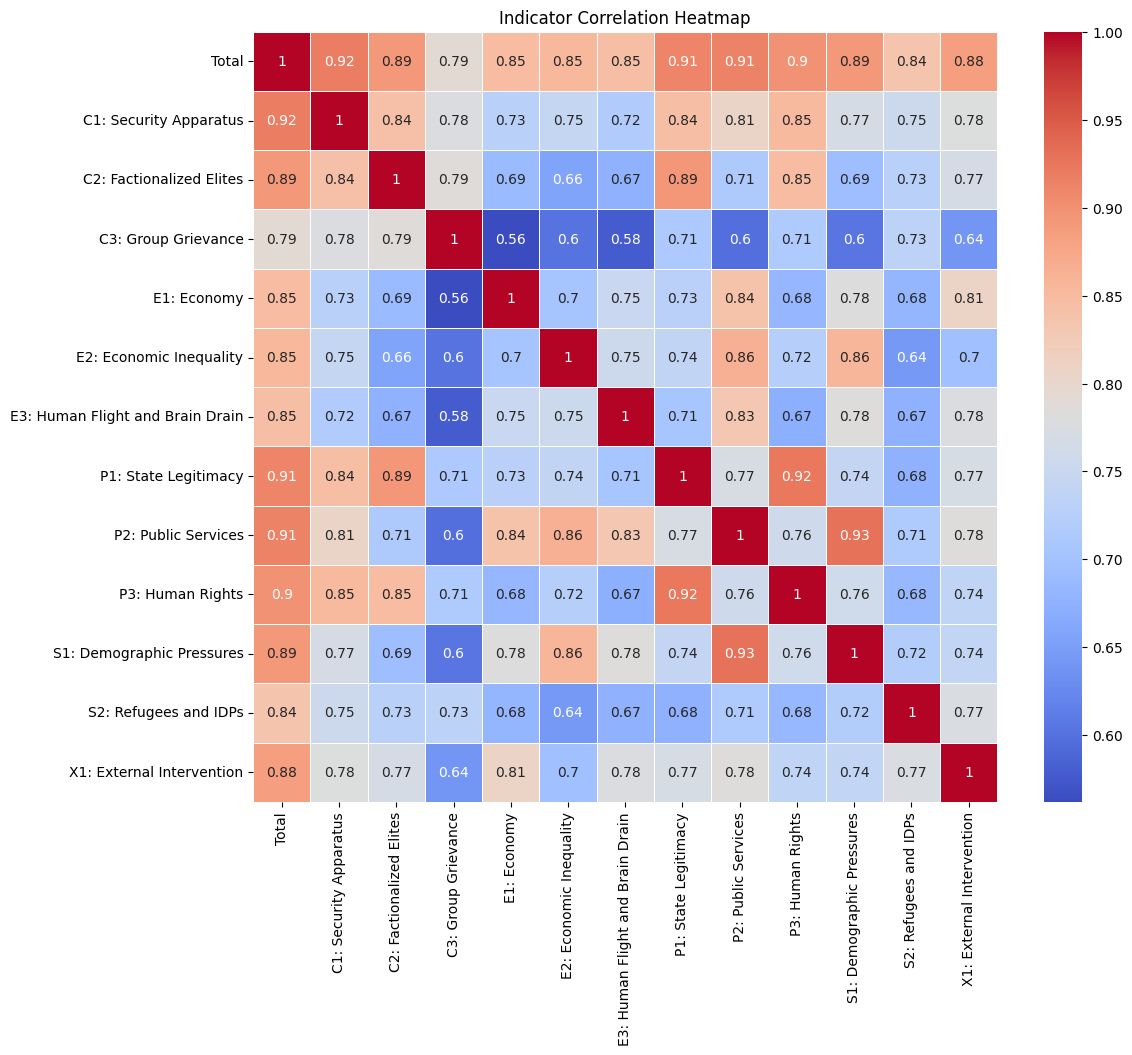

In [56]:
indicators = combined_train[['Total', 'C1: Security Apparatus', 'C2: Factionalized Elites', 'C3: Group Grievance',
                       'E1: Economy', 'E2: Economic Inequality', 'E3: Human Flight and Brain Drain',
                       'P1: State Legitimacy', 'P2: Public Services', 'P3: Human Rights',
                       'S1: Demographic Pressures', 'S2: Refugees and IDPs', 'X1: External Intervention']]
correlation_matrix = indicators.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Indicator Correlation Heatmap')
plt.show()

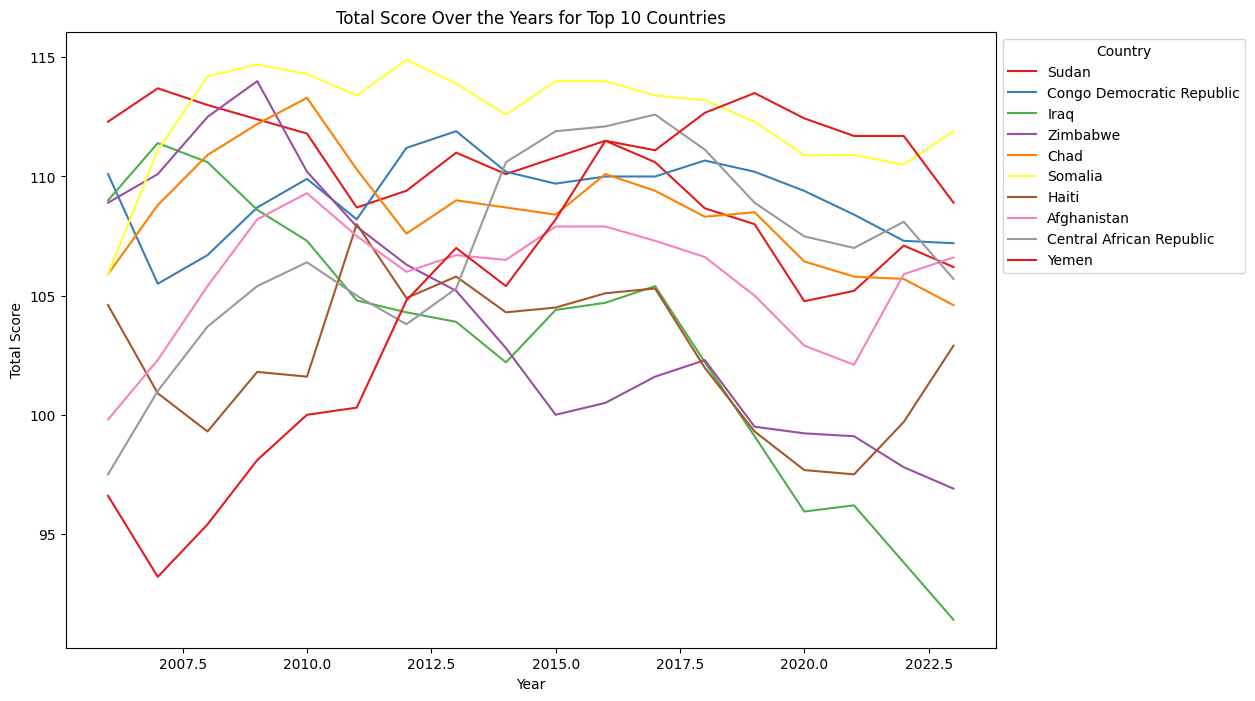

In [57]:
top_10_countries = combined_train.groupby('Country')['Total'].mean().nlargest(10).index
df_top_10 = combined_train[combined_train['Country'].isin(top_10_countries)]
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Total', hue='Country', data=df_top_10, palette='Set1')
plt.title('Total Score Over the Years for Top 10 Countries')
plt.xlabel('Year')
plt.ylabel('Total Score')
plt.legend(title='Country', bbox_to_anchor=(1, 1))
plt.show()

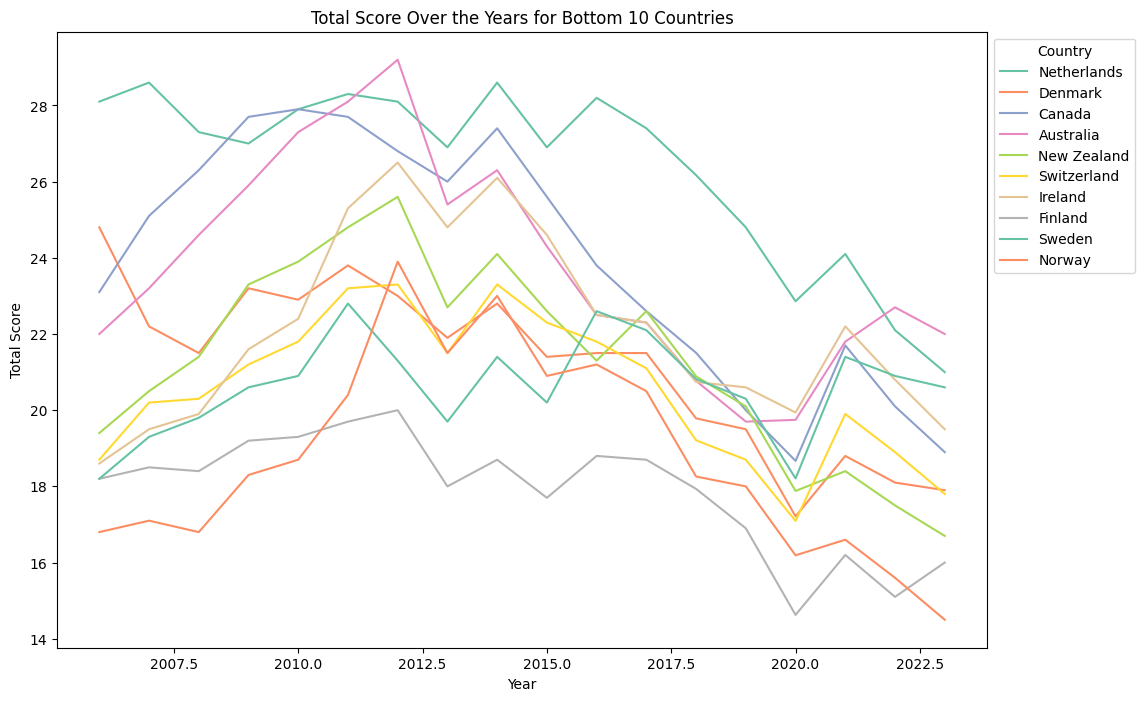

In [58]:
bottom_10_countries = combined_train.groupby('Country')['Total'].mean().nsmallest(10).index
df_bottom_10 = combined_train[combined_train['Country'].isin(bottom_10_countries)]
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Total', hue='Country', data=df_bottom_10, palette='Set2')
plt.title('Total Score Over the Years for Bottom 10 Countries')
plt.xlabel('Year')
plt.ylabel('Total Score')
plt.legend(title='Country', bbox_to_anchor=(1, 1))
plt.show()

<ipython-input-59-814667724fb4>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




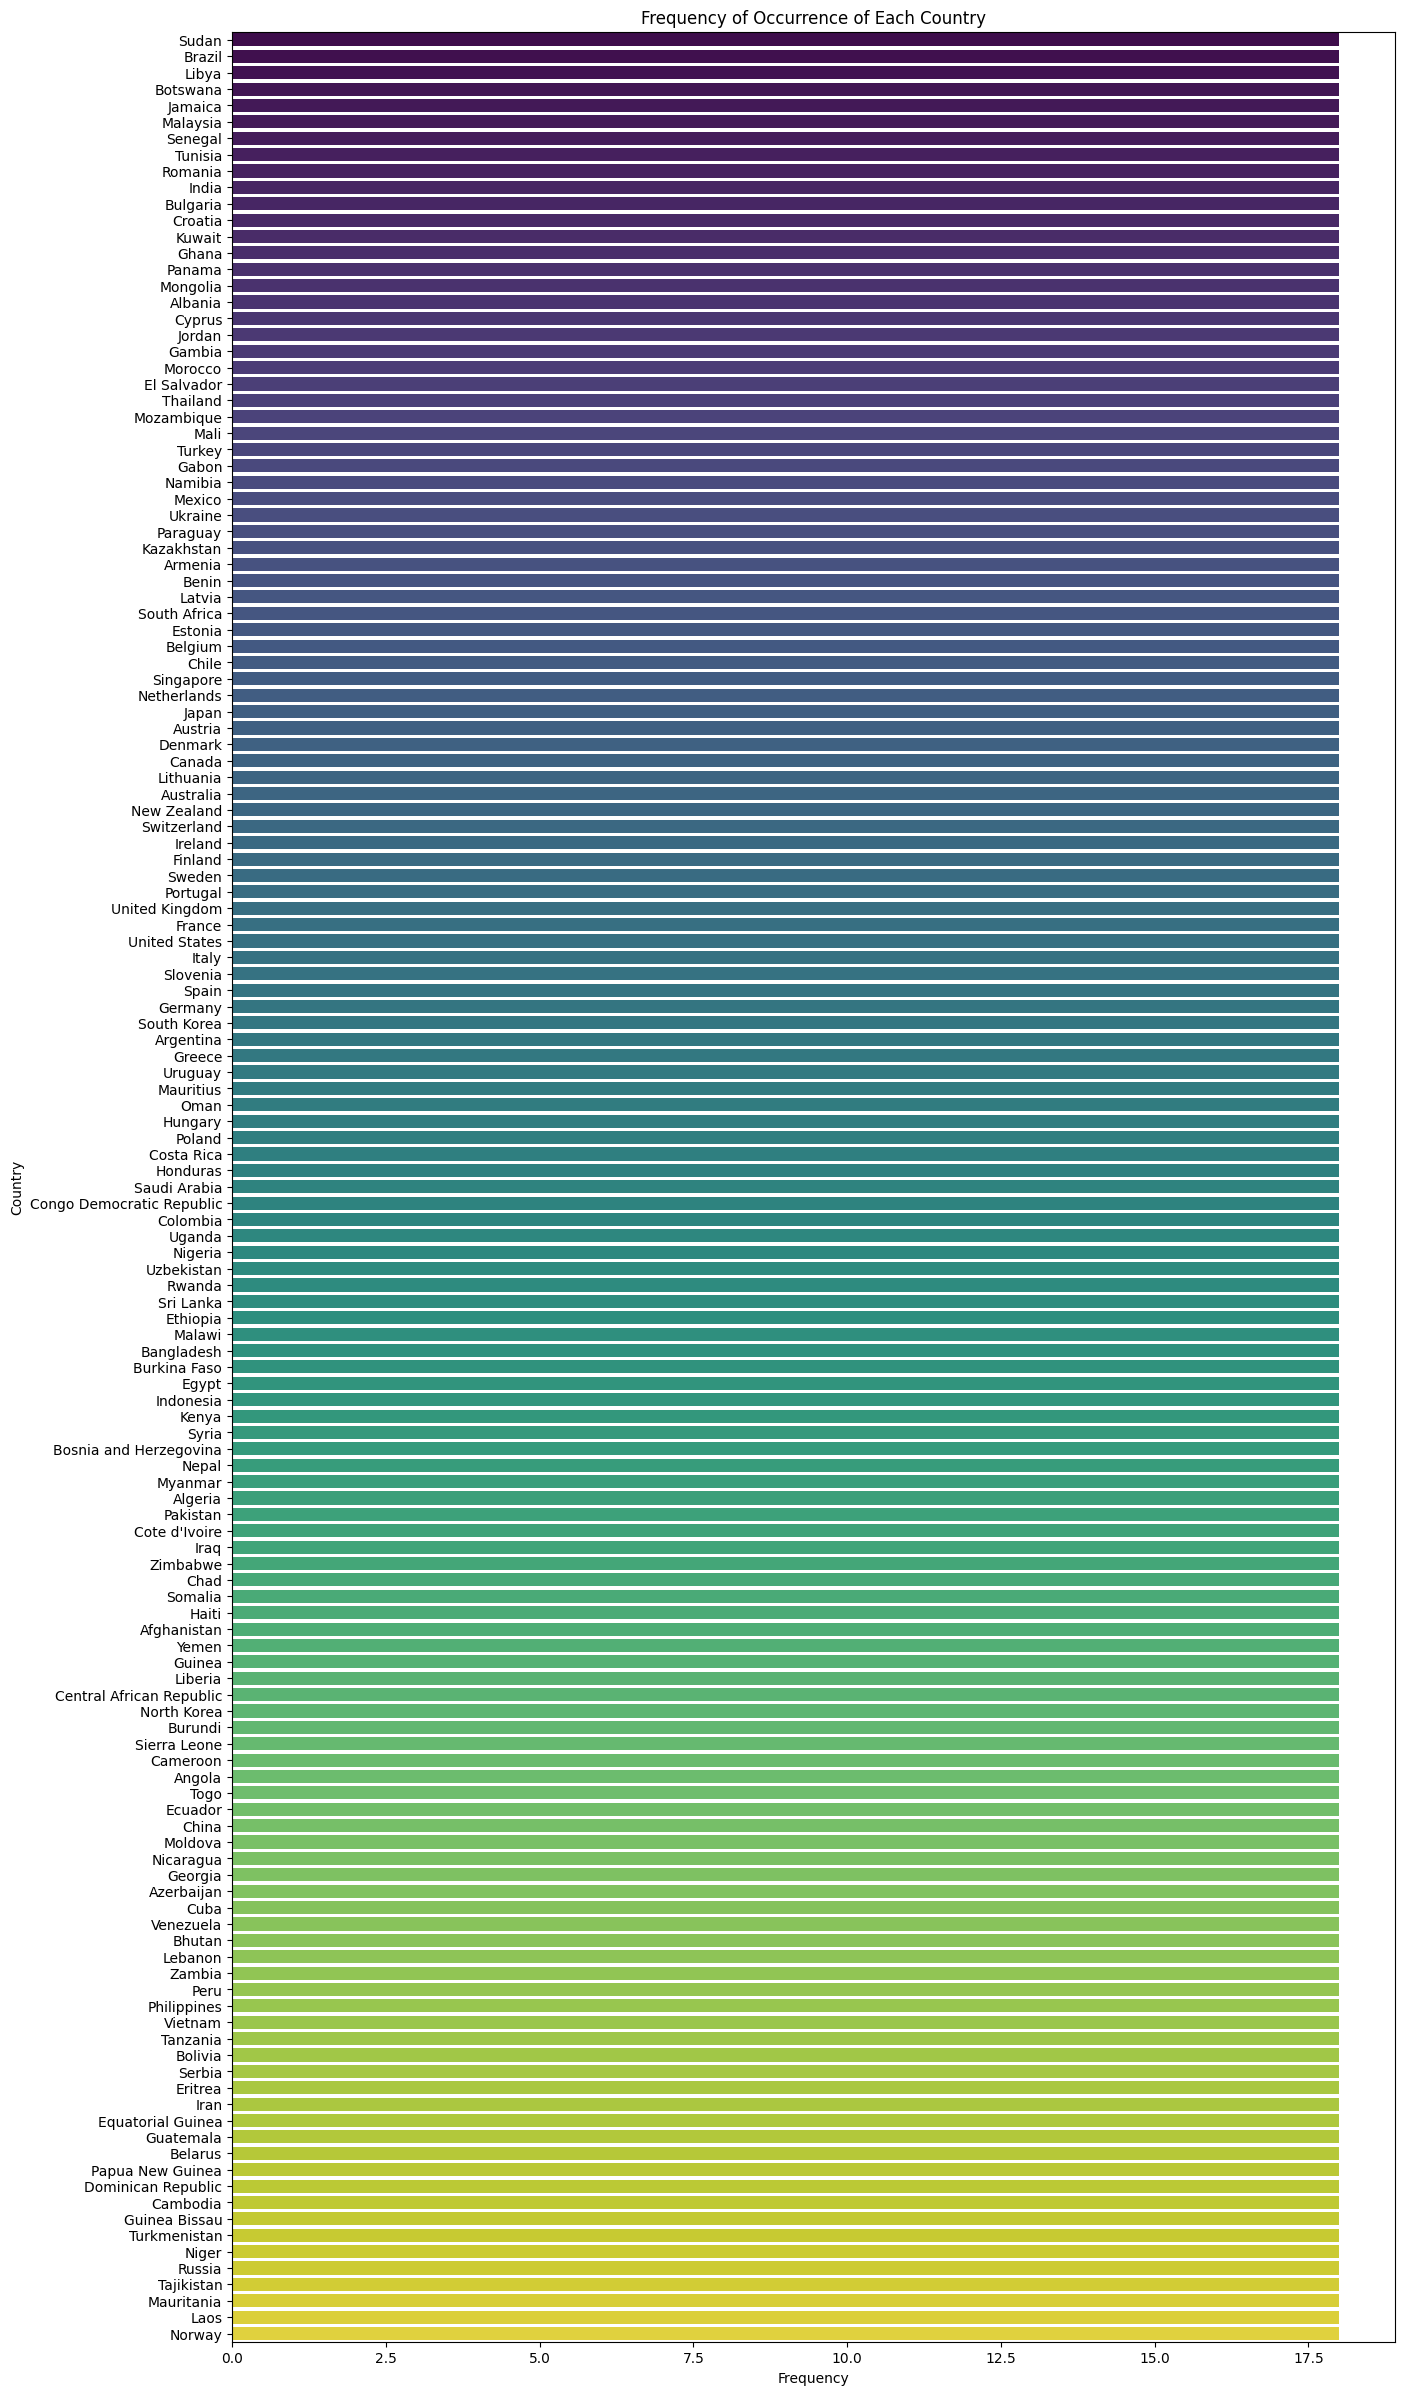

In [59]:
country_counts = combined_train['Country'].value_counts()
plt.figure(figsize=(15, 30))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')
plt.title('Frequency of Occurrence of Each Country')
plt.xlabel('Frequency')
plt.ylabel('Country')
plt.show()

In [60]:
country_counts = combined_train['Country'].value_counts()
unique_countries = pd.DataFrame({'Country': country_counts.index, 'Frequency': country_counts.values})
unique_countries.Frequency.value_counts()

,count
Frequency,
18,141


In [61]:
combined_train.to_csv("combined_train_clean.csv")